# Regularized Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Preliminary Flow

### Load Data

In [ ]:
#load data
df = pd.read_csv("/content/drive/MyDrive/Dibimbing DS31/Assignment/Assignment Regression/boston.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


|Columns | Description |
| - | - |
crim  | Criminal rate
zn | Residential land zoned proportion <br>
indus | Non-retail business acres proportion <br>
chas | Is bounds with river (1 if tract bounds river; 0 otherwise) <br>
nox | Nitrogen oxides concentration <br>
rm | Number rooms average <br>
age | Owner age proportion <br>
dis | Weighted distance to cities <br>
rad | Accessibility index <br>
tax | Tax rate <br>
ptratio | Pupil-teacher ratio <br>
black | Black proportion <br>
lstat | Percent lower status <br>
medv | Predicting housing price <br>

Goals : I want to know how much a house costs based on its neighborhood conditions (number of rooms, location, pollution, schools, etc.). So, medv = the output i want to predict.

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Preprocessing

In [ ]:
#handling duplicate
len(df.drop_duplicates()) / len(df)

1.0

In [ ]:
#handling missing value
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


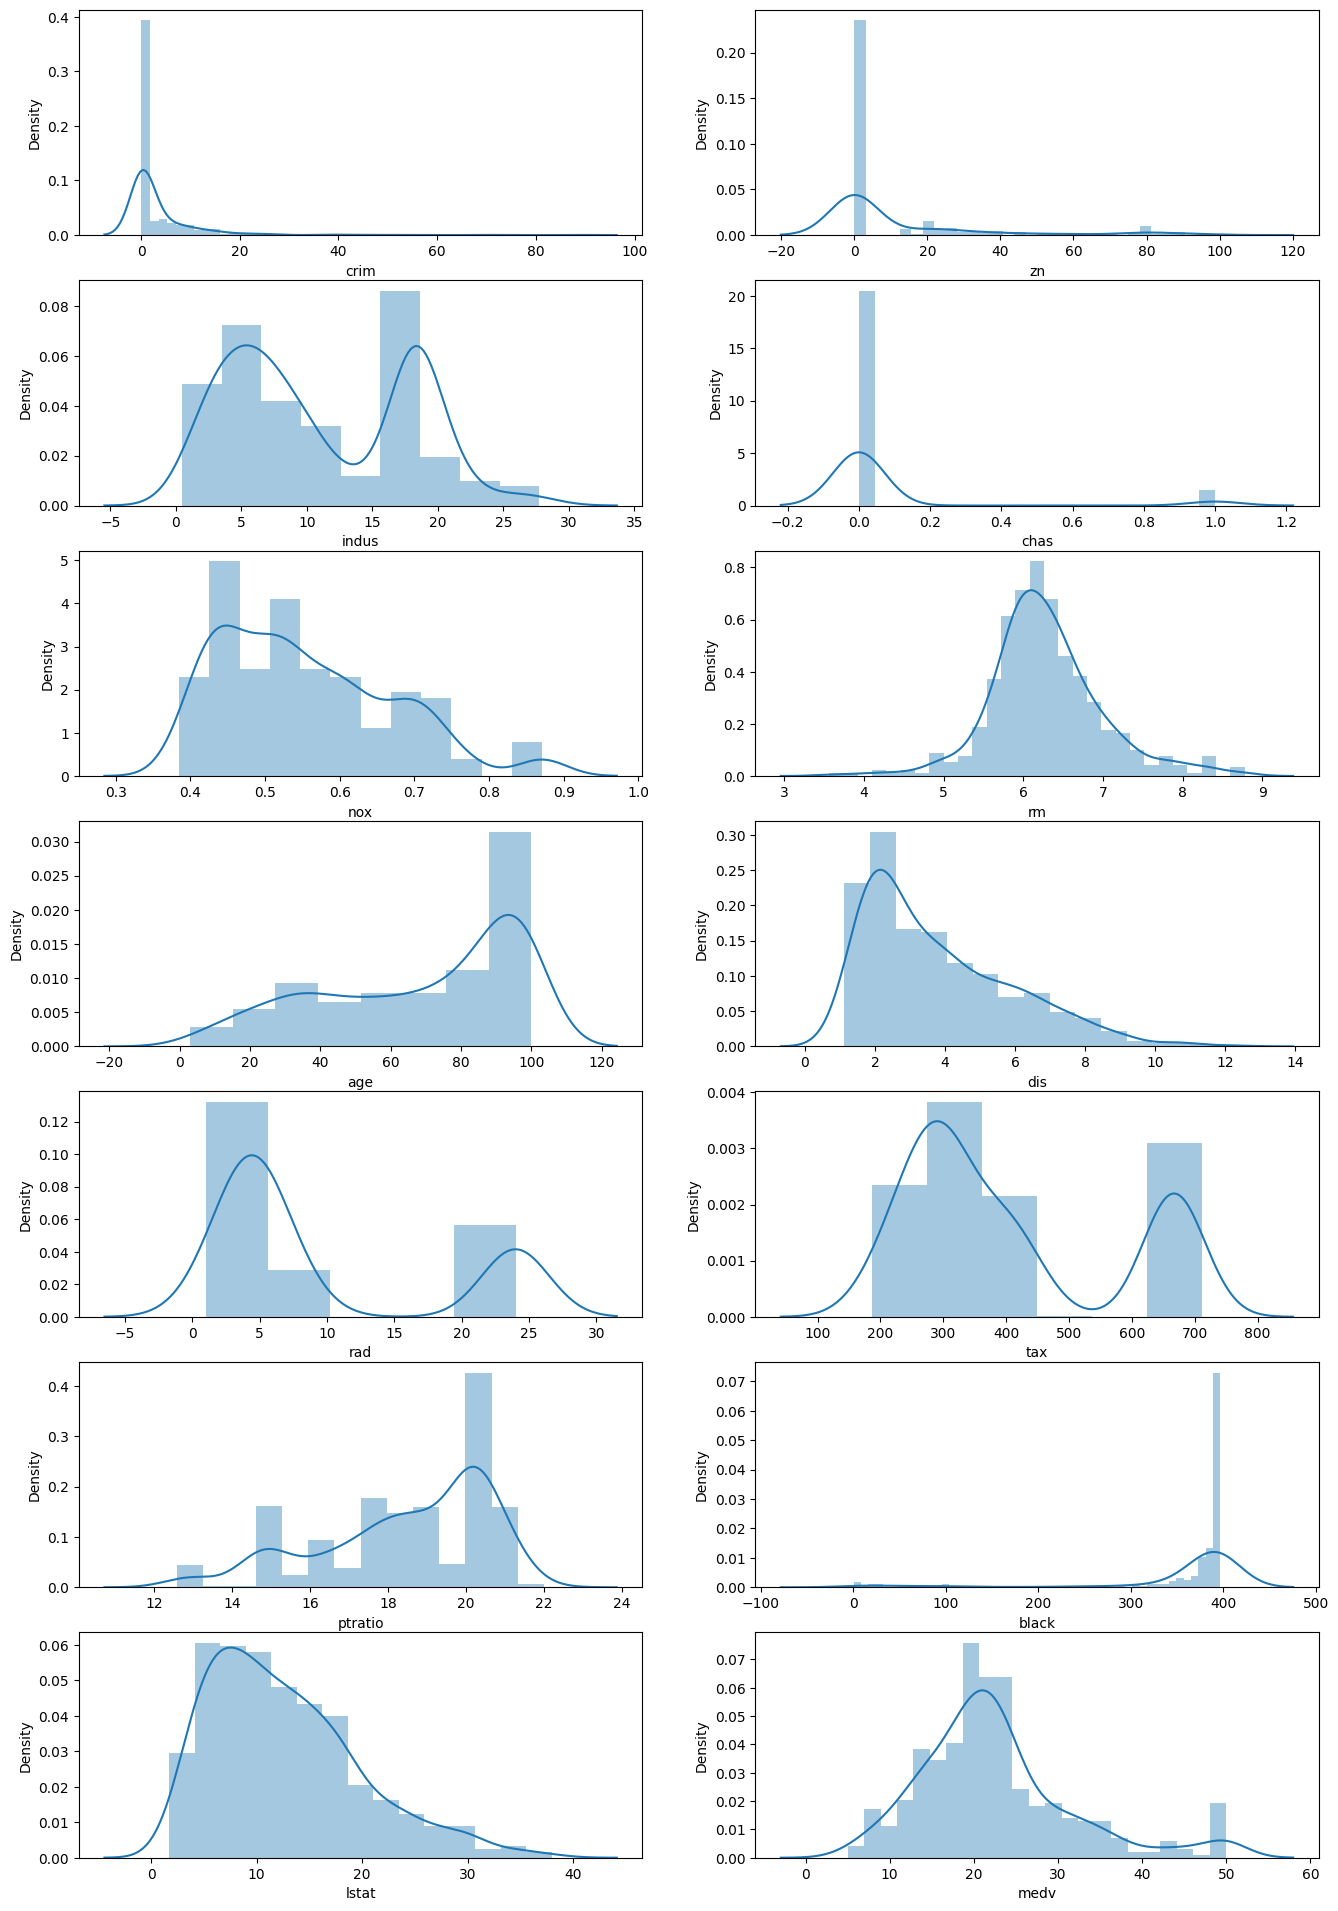

In [ ]:
#look at the distribution plot
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df[i],ax=ax)

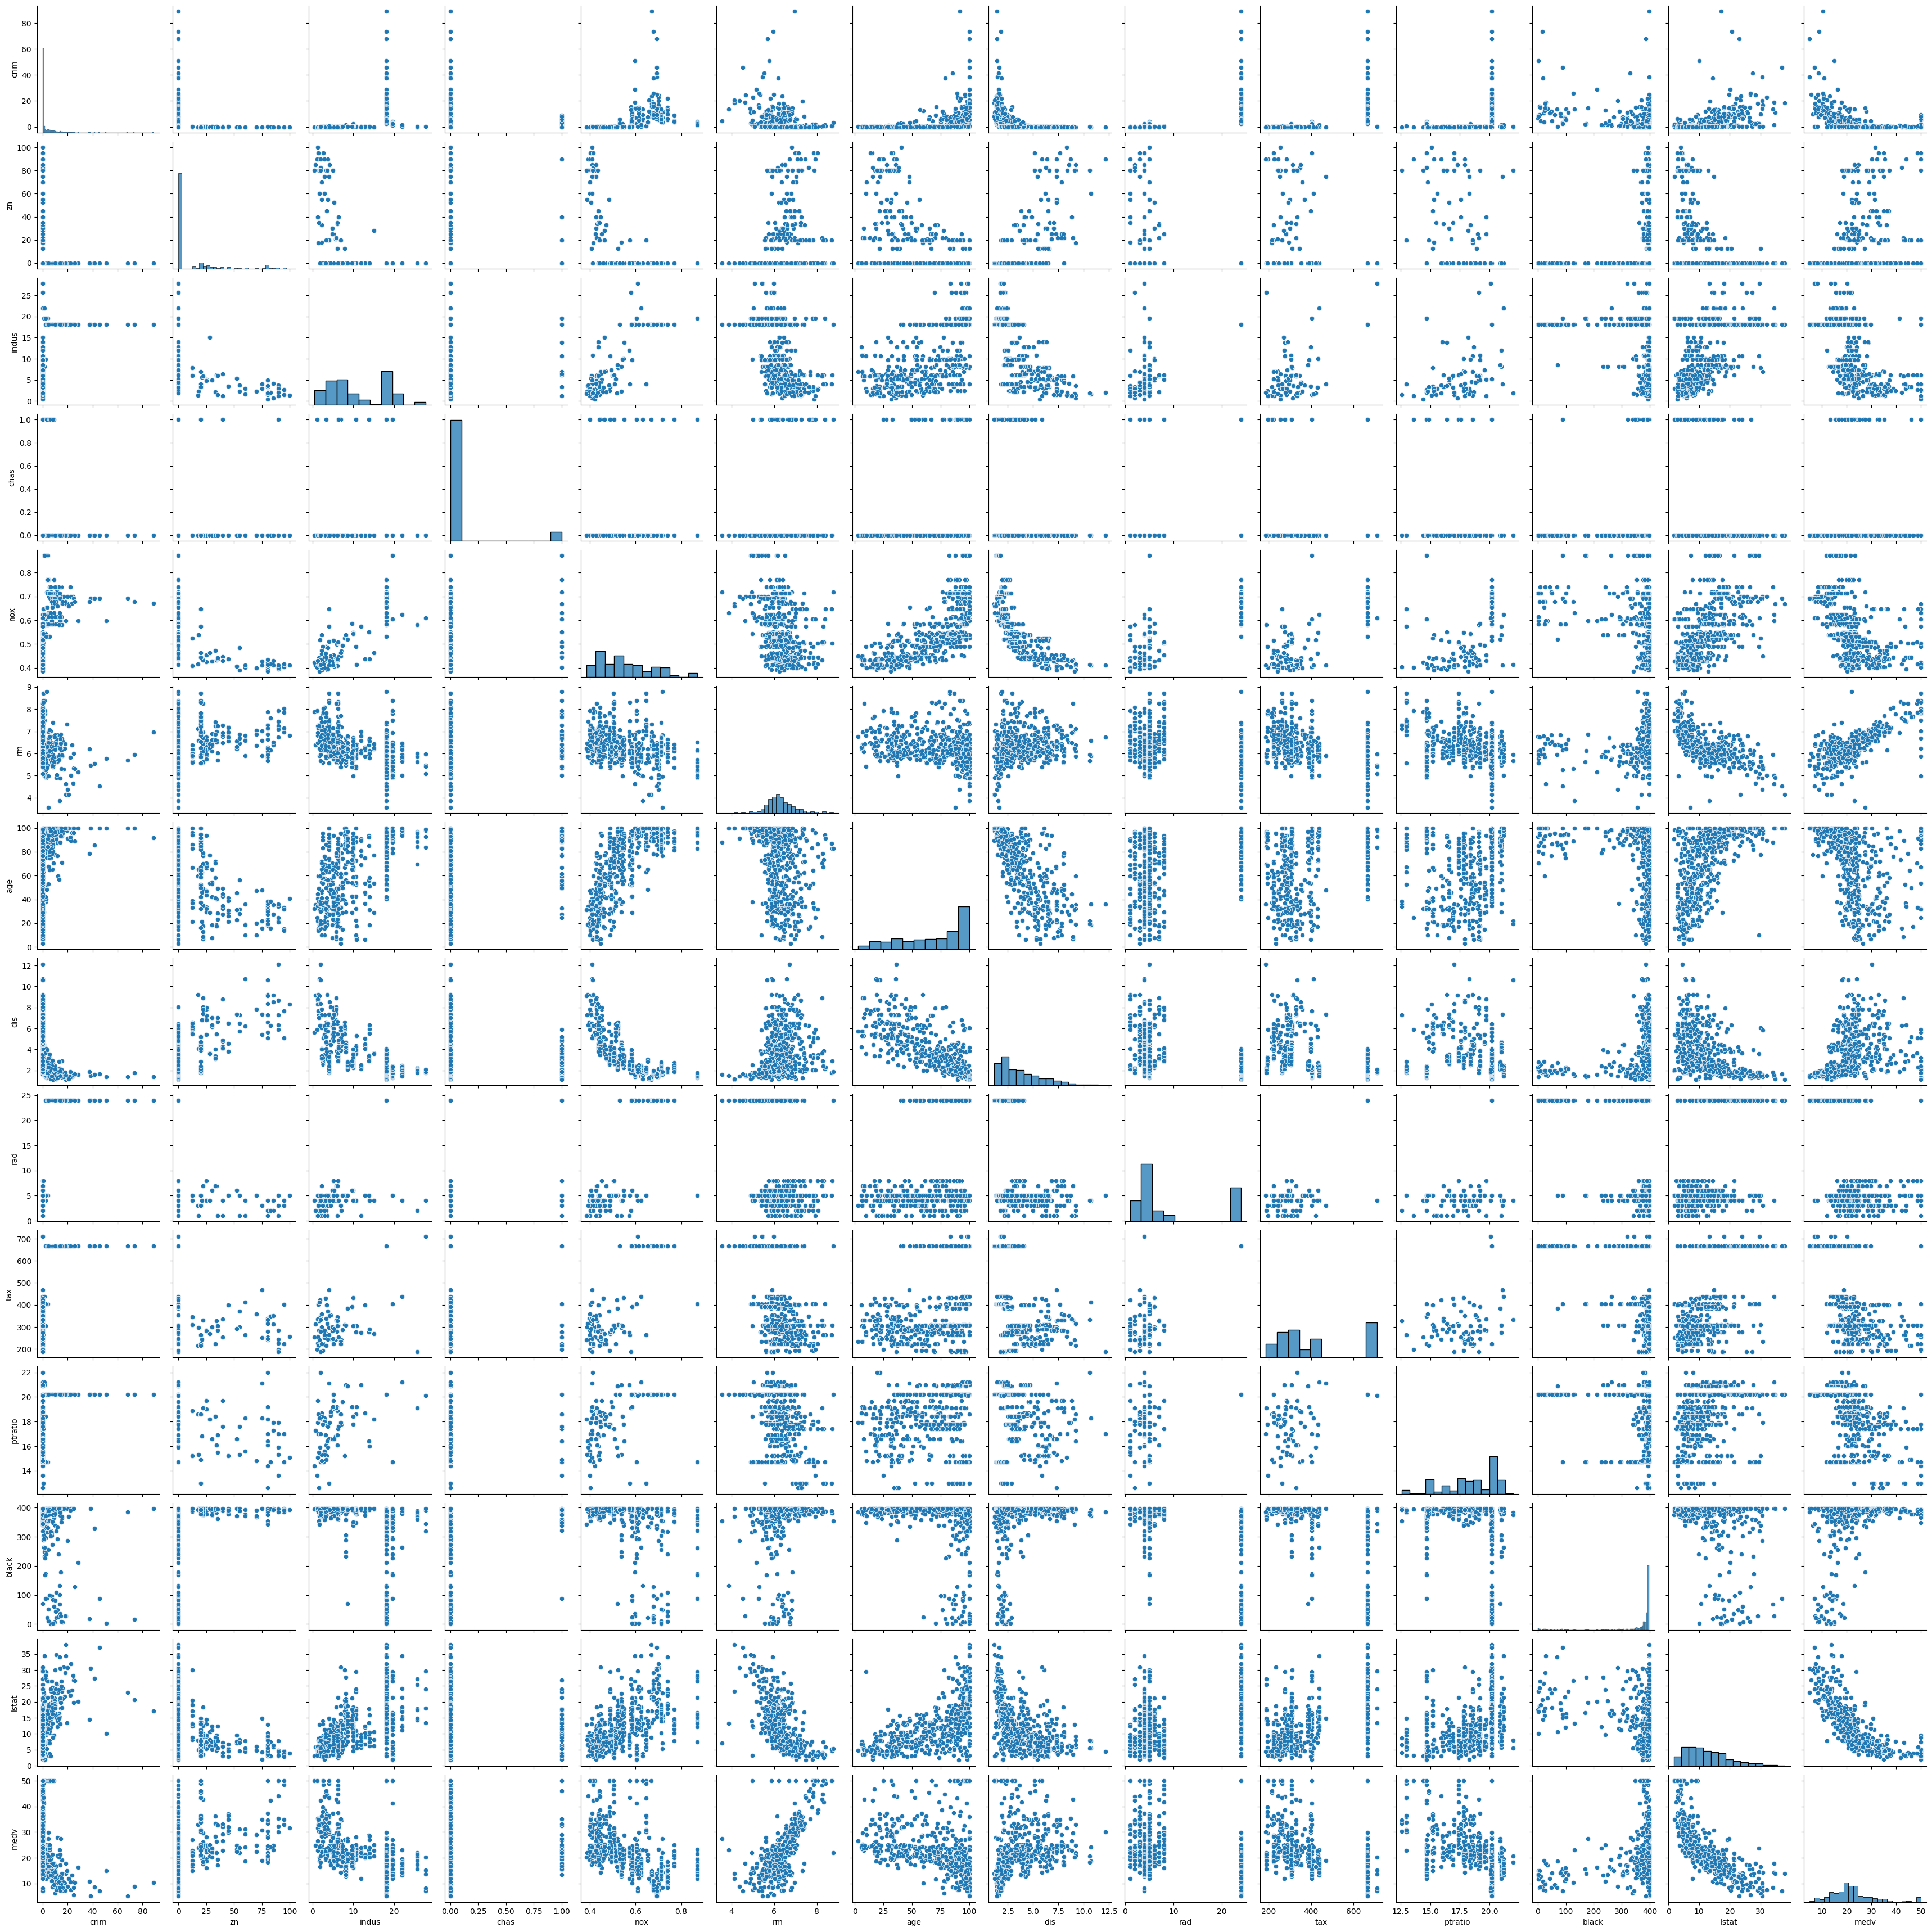

In [ ]:
sns.pairplot(df)

<Axes: xlabel='nox', ylabel='medv'>

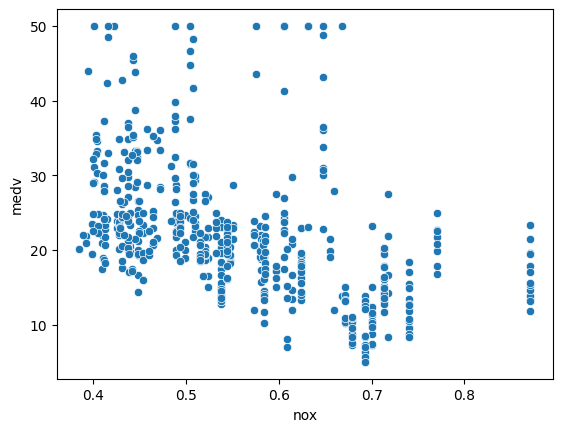

In [ ]:
# Crim vs medv
sns.scatterplot(data=df, x='nox', y='medv')

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(
    feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_train, feature_validation, target_train, target_validation = train_test_split(
    feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are several features with high VIF scores:
1. `rad`
2. `tax`


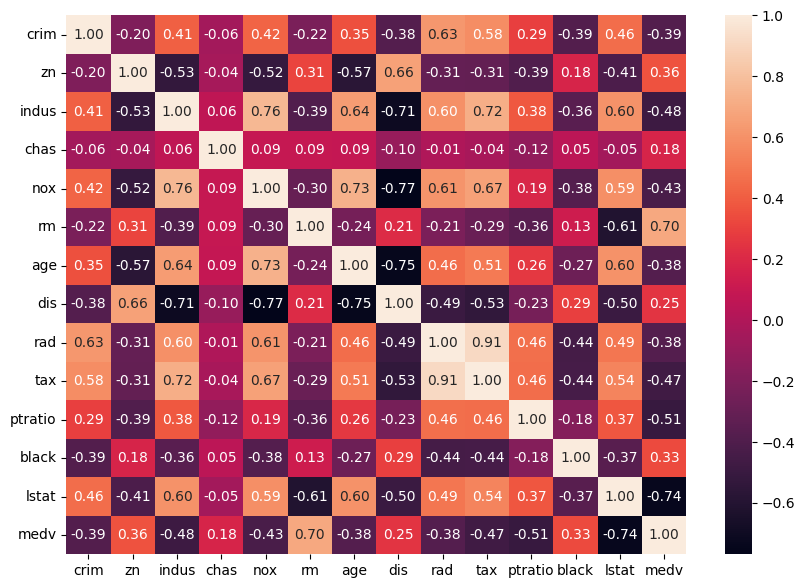

In [ ]:
# heatmap correlation
df_train = pd.concat([feature_train, target_train], axis=1)
corr = df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

I choose to retain `tax`. Therefore, I need to drop `rad`.


In [ ]:
# drop multicollinear features
feature_train = feature_train.drop(columns=['rad'])
feature_validation = feature_validation.drop(columns=['rad'])
feature_test = feature_test.drop(columns=['rad'])

### Recheck VIF

In [ ]:
# recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


I think its good !

# Model Training

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
x_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(x_train, y_train)
ridge_reg_pointone.fit(x_train, y_train)
ridge_reg_one.fit(x_train, y_train)
ridge_reg_ten.fit(x_train, y_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

x_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(x_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


Ridge with alpha = 10 seems to be the best model, as it has the smallest RMSE.

### Coefficients

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# train the model
x_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(x_train, y_train)
lasso_reg_pointone.fit(x_train, y_train)
lasso_reg_one.fit(x_train, y_train)
lasso_reg_ten.fit(x_train, y_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

x_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(x_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Lasso with alpha = 1.0 seems to be the best model, as it has the smallest RMSE.

### Coefficients

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


<Figure size 1200x600 with 0 Axes>

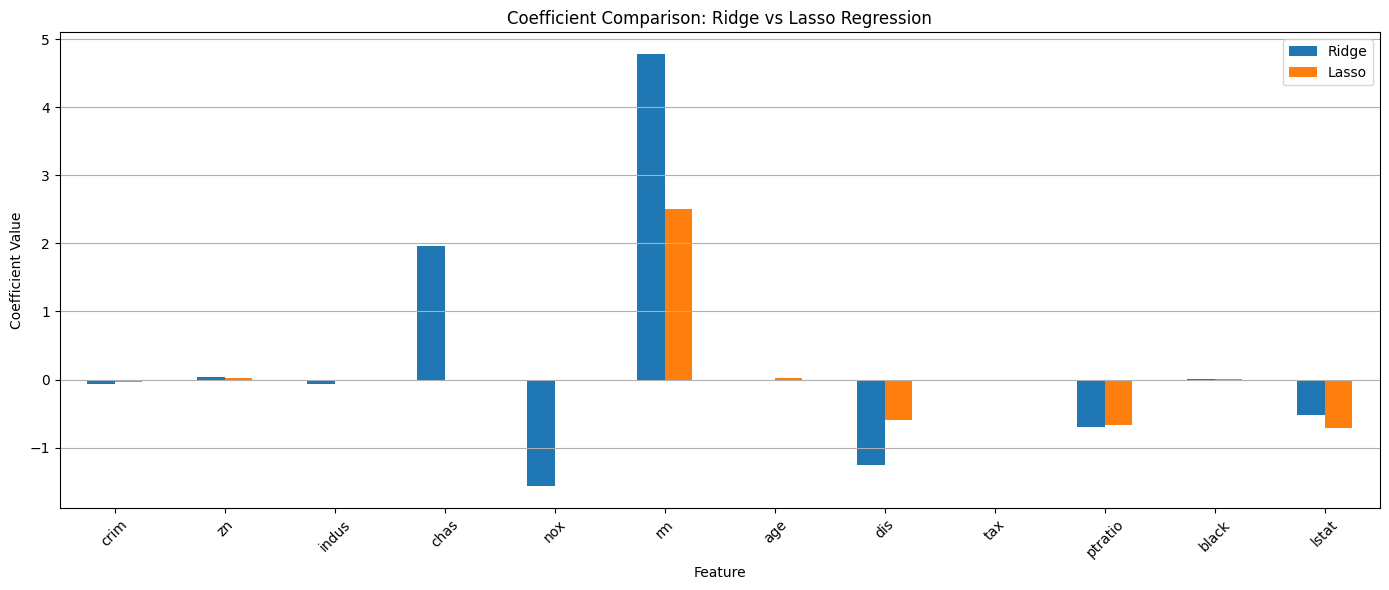

In [ ]:
#coefficients from Ridge and Lasso
ridge_coef = ridge_best.coef_
lasso_coef = lasso_best.coef_
features = feature_train.columns.tolist()

#create DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef
}).set_index('Feature')

#plot coefficient Comparison
plt.figure(figsize=(12, 6))
coef_df.plot(kind='bar', figsize=(14, 6))
plt.title('Coefficient Comparison: Ridge vs Lasso Regression')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Conclusion:
- `rm`(number of rooms) is the most significant factor to increase house prices
- `nox`, `ptratio`, `lstat` and `dis` are the most significant factors to decrease house prices.

### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(x_train)

print("R-squared for training data is {}".format(r2_score(y_train, y_predict_train)))

R-squared for training data is 0.7485875263669821


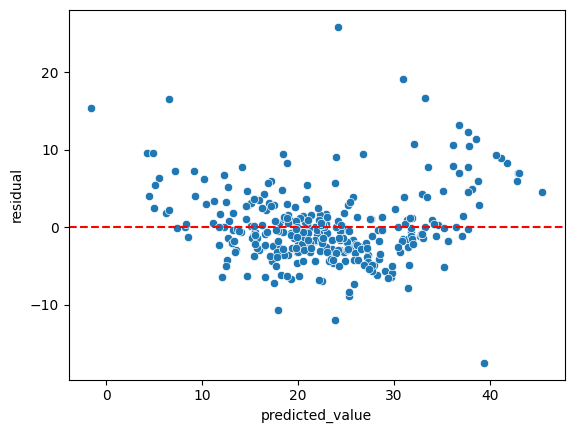

In [ ]:
#calculate residual
residual = y_train - y_predict_train

#prepare dataframe
df_resid = pd.DataFrame({"predicted_value":y_predict_train, "residual":residual})

#residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Assumption:
- Linear Relationship : ✅ , no curved or systematic patterns
- Variance Stable : ⚠️ , little spread in high predictions
- Independent Residuals : ✅ , residuals are randomly distibuted

# Model Evaluation

## Training Error (Ridge)

In [ ]:
#prepare prediction result on train data
y_predict_train = ridge_best.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_predict_train)))
print("MAPE for training data is {}".format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.77864036104011
MAE for training data is 3.3776762058865626
MAPE for training data is 0.168680736633595


## Testing Error (Ridge)

In [ ]:
#prepare prediction result on test data
x_test = feature_test.to_numpy()
y_predict_test = ridge_best.predict(x_test)

#ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("RMSE for testing data is {}".format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print("MAE for testing data is {}".format(mean_absolute_error(y_test, y_predict_test)))
print("MAPE for testing data is {}".format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.244481645704498
MAPE for testing data is 0.17618402626767926


Conclusion:
- This model is in `Good Fit` ✅
- ❌ Not overfitting : because the training & testing errors are almost the same
- ❌ Not underfitting : because the errors are small enough and the model learns well

- Nilai RMSE train (4.77) dan RMSE test (5.16) cukup dekat ➝ menandakan model generalize dengan baik.
- Nilai MAPE test = 17.61%, artinya kesalahan rata-rata hanya sekitar 17.6% dari nilai aktual, yang tergolong baik dalam banyak kasus regresi.
- MAE train = 3.38 vs MAE test = 3.24 → kesalahan absolut model stabil antar data.

## Training Error (Lasso)

In [ ]:
#prepare prediction result on train data
y_predict_train = lasso_best.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("RMSE for training data is {}".format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print("MAE for training data is {}".format(mean_absolute_error(y_train, y_predict_train)))
print("MAPE for training data is {}".format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


## Testing Error (Lasso)

In [ ]:
#prepare prediction result on test data
x_test = feature_test.to_numpy()
y_predict_test = lasso_best.predict(x_test)

#ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("RMSE for testing data is {}".format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print("MAE for testing data is {}".format(mean_absolute_error(y_test, y_predict_test)))
print("MAPE for testing data is {}".format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


Conclusion:
- This model is in `Good Fit` ✅
- ❌ Not overfitting : because the training & testing errors are almost the same
- ❌ Not underfitting : because the errors are small enough and the model learns well

- Perbedaan antara RMSE train (5.17) dan test (5.13) sangat kecil ➝ artinya model generalize dengan baik.
- MAPE testing 17.86% artinya model salah prediksi rata-rata sebesar 17.86% dari nilai sebenarnya.


In [ ]:
import joblib

# Simpan model Ridge
joblib.dump(ridge_best, "ridge_model.joblib")

['ridge_model.joblib']